In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))


In [50]:
shooting = pd.read_csv('fatal-police-shootings-correction.csv', index_col = None ,
                                 encoding = 'ISO-8859-1' )
#income = pd.read_csv('MedianHouseholdIncome2015-Corrected.csv', index_col = None ,
                               #  encoding = 'ISO-8859-1' )
#education = pd.read_csv('PercentOver25CompletedHighSchool-Correction.csv', index_col = None ,
                                # encoding = 'ISO-8859-1' )
#poverty = pd.read_csv('PercentagePeopleBelowPovertyLevel-Correction.csv', index_col = None ,
                                # encoding = 'ISO-8859-1' )
#race = pd.read_csv('ShareRaceByCity-correction.csv', index_col = None ,
                                # encoding = 'ISO-8859-1' )
circum = pd.read_csv('test.csv', index_col = None ,
                                 encoding = 'ISO-8859-1' )

In [5]:
#circum = pd.merge(education, income , how = 'left' , on = ['Geographic Area' , 'City'])
#circum = pd.merge(circum , poverty , how = 'left' , on = ['Geographic Area' , 'City'])
#circum = pd.merge(circum , race , how = 'left' , on = ['Geographic Area' , 'City'])

In [51]:
circum.head()

,Unnamed: 0,Geographic Area,City,percent_completed_hs,Median Income,poverty_rate
0,0,AK,Chicken CDP,NaN,NaN,NaN
1,1,AK,Chisana CDP,NaN,NaN,NaN
2,2,AK,Dot Lake CDP,NaN,NaN,NaN
3,3,AK,Edna Bay city,NaN,NaN,NaN
4,4,AK,Eureka Roadhouse CDP,NaN,NaN,NaN


In [52]:
shooting.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [53]:
def age_range(age):
    if (age < 13):
        return 'Under 12'
    elif (age> 12) & (age < 20):
        return '13 - 19'
    elif (age > 19) & (age < 36):
        return'20 - 35'
    elif (age > 35) & (age < 50):
        return '36 - 49'
    elif (age > 49) & (age < 65):
        return '50 - 64'
    elif (age> 64):
        return 'Over 65'

In [ ]:
shooting['date'] = pd.to_datetime(shooting['date'])
shooting['Age_range'] = shooting['age'].apply(lambda row : age_range(row) )
shooting = shooting[~(shooting.name == 'TK TK')]

In [55]:
shooting.Age_range.value_counts()

20 - 35     1542
36 - 49      934
50 - 64      491
13 - 19      173
Over 65      100
Under 12       3
Name: Age_range, dtype: int64

In [56]:
shooting['daysofweek'] = shooting.date.dt.day_name()
shooting.daysofweek.value_counts()


Wednesday    516
Tuesday      508
Thursday     488
Sunday       484
Friday       479
Saturday     445
Monday       433
Name: daysofweek, dtype: int64

In [57]:
shooting.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_range,daysofweek
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,50 - 64,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,36 - 49,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,20 - 35,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,20 - 35,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,36 - 49,Sunday


In [220]:
monthly_state = shooting.groupby(['state' ,'gender', 'race'])
#print (type(shooting.date))

In [221]:
monthly_state.count()

id  name  date  manner_of_death  armed  age  city  \
state gender race                                                       
AK    F      N       1     1     1                1      1    1     1   
      M      B       1     1     1                1      1    1     1   
             N       7     7     7                7      7    7     7   
             W      10    10    10               10     10   10    10   
AL    F      W       4     4     4                4      4    4     4   
      M      B      18    18    18               18     18   18    18   
             H       1     1     1                1      1    1     1   
             W      41    41    41               41     41   41    41   
AR    M      A       1     1     1                1      1    1     1   
             B       9     9     9                9      9    9     9   
             W      22    22    22               22     22   22    22   
AZ    F      B       1     1     1                1      1    1     1   
             H       4     4     4                4      4    4     4   
             N       2     2     2                2      2    2     2   
             W       6     6     6                6      6    6     6   
      M      B      10    10    10               10     10   10    10   
             H      45    45    45               45     45   44    45   
             N       6     6     6                6      6    6     6   
             W      71    71    71               71     71   71    71   
CA    F      A       1     1     1                1      1    1     1   
             B       7     7     7                7      7    7     7   
             H       3     3     3                3      3    3     3   
             O       2     2     2                2      2    2     2   
             W       9     9     9                9      9    9     9   
      M      A      19    19    19               19     19   18    19   
             B      80    80    80               80     79   79    80   
             H     210   210   210              210    210  205   210   
             N       2     2     2                2      2    2     2   
             O       7     7     7                7      7    7     7   
             W     142   142   142              142    142  141   142   
...                ...   ...   ...              ...    ...  ...   ...   
VA    F      B       3     3     3                3      3    3     3   
             W       1     1     1                1      1    1     1   
      M      A       1     1     1                1      1    1     1   
             B      28    28    28               28     28   28    28   
             H       4     4     4                4      4    3     4   
             W      29    29    29               29     29   29    29   
VT    M      N       1     1     1                1      1    1     1   
             W       5     5     5                5      5    5     5   
WA    F      B       1     1     1                1      1    1     1   
             N       2     2     2                2      2    2     2   
             W       1     1     1                1      1    1     1   
      M      A       4     4     4                4      4    4     4   
             B      10    10    10               10     10   10    10   
             H       8     8     8                8      8    8     8   
             N       4     4     4                4      4    4     4   
             O       2     2     2                2      2    2     2   
             W      41    41    41               41     41   41    41   
WI    F      W       1     1     1                1      1    1     1   
      M      A       1     1     1                1      1    1     1   
             B      13    13    13               13     13   13    13   
             H       2     2     2                2      2    2     2   
             N       4     4     4                4      4    4     4   
     

In [58]:
female = shooting[shooting.gender == 'F']
female.date.dt.month.value_counts()

10    18
3     18
1     17
2     15
12    13
4     13
5     10
8      9
6      9
7      8
11     7
9      5
Name: date, dtype: int64

In [59]:
male = shooting[shooting.gender == 'M']
male.date.dt.month.value_counts()

3     346
1     324
2     322
4     299
7     262
5     256
8     249
11    232
12    232
6     232
10    228
9     224
Name: date, dtype: int64

In [122]:
female.date.dt.dayofweek.value_counts()

1    25
4    22
6    21
2    21
3    18
0    18
5    17
Name: date, dtype: int64

In [126]:
female.date.dt.day_name().value_counts()

Tuesday      25
Friday       22
Sunday       21
Wednesday    21
Monday       18
Thursday     18
Saturday     17
Name: date, dtype: int64

In [127]:
daysofweek = male.date.dt.day_name().value_counts()

Wednesday    494
Tuesday      483
Thursday     469
Sunday       463
Friday       457
Saturday     426
Monday       414
Name: date, dtype: int64

In [297]:
months = shooting.date.dt.month_name()
months.value_counts()

March        365
January      341
February     339
April        312
July         270
May          266
August       258
December     246
October      246
June         241
November     239
September    230
Name: date, dtype: int64

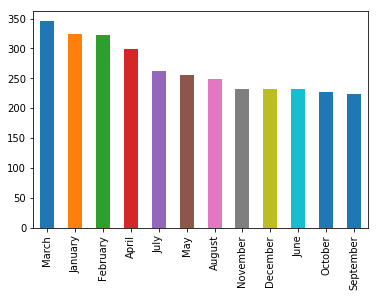

In [301]:
male.date.dt.month_name().value_counts().plot(kind = 'bar')

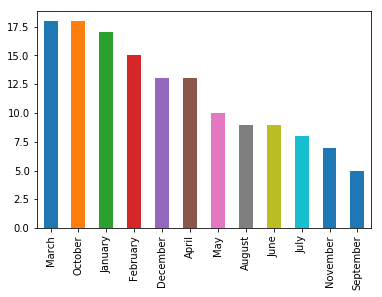

In [302]:
female.date.dt.month_name().value_counts().plot(kind = 'bar')

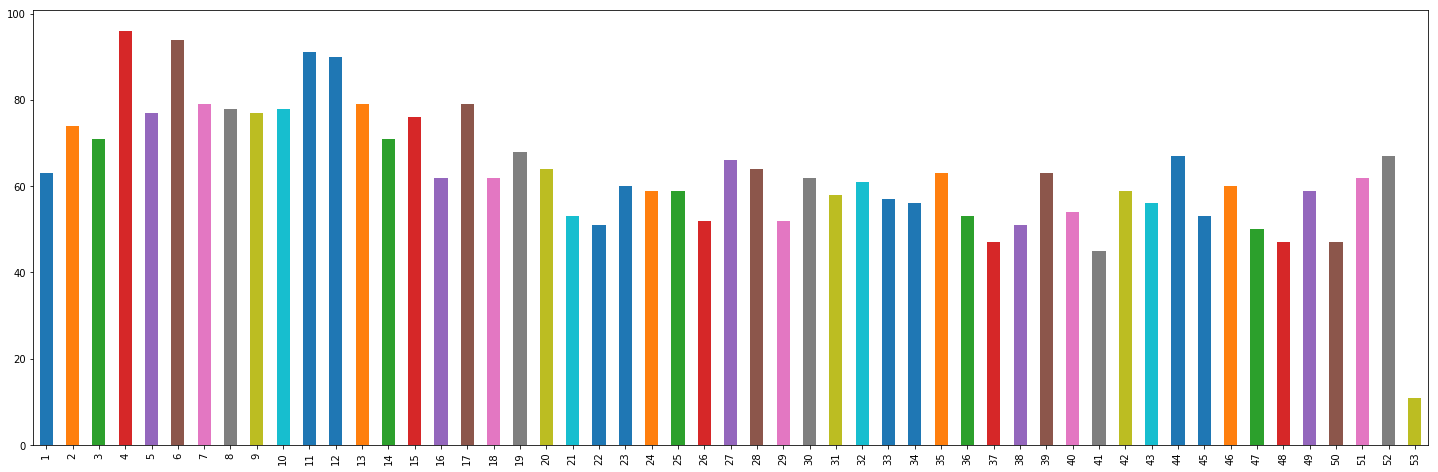

In [26]:
fig = plt.figure(figsize = (25, 8))
shooting.date.dt.week.value_counts().sort_index().plot(kind = 'bar')

In [311]:
shooting.date.dt.is_month_end.value_counts()

False    3255
True       98
Name: date, dtype: int64

In [312]:
shooting.date.dt.is_month_start.value_counts()

False    3247
True      106
Name: date, dtype: int64

In [251]:
shooting[['body_camera' , 'daysofweek','manner_of_death']].groupby(['body_camera' , 'daysofweek']).count()

manner_of_death
body_camera daysofweek                 
False       Friday                  440
            Monday                  381
            Saturday                385
            Sunday                  436
            Thursday                440
            Tuesday                 454
            Wednesday               466
True        Friday                   39
            Monday                   52
            Saturday                 60
            Sunday                   48
            Thursday                 48
            Tuesday                  54
            Wednesday                50

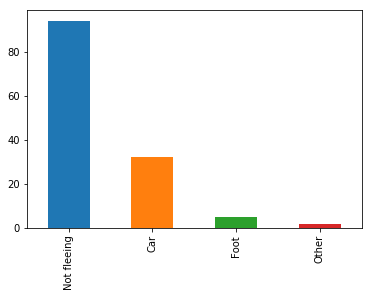

In [16]:
female[female.manner_of_death == 'shot'].flee.value_counts().plot(kind = 'bar')

In [64]:
pd.pivot_table(shooting , index=['Age_range' , 'daysofweek' , 'race', 'body_camera'] , aggfunc = 'count').head()

age  armed  city  date  flee  gender  \
Age_range daysofweek race body_camera                                         
13 - 19   Friday     A    False          1      1     1     1     1       1   
                     B    False          9      9     9     9     9       9   
                     H    False          1      1     1     1     1       1   
                     W    False          5      5     5     5     4       5   
          Monday     B    False         12     12    12    12    12      12   

                                       id  manner_of_death  name  \
Age_range daysofweek race body_camera                              
13 - 19   Friday     A    False         1                1     1   
                     B    False         9                9     9   
                     H    False         1                1     1   
                     W    False         5                5     5   
          Monday     B    False        12               12    12   

                                       signs_of_mental_illness  state  \
Age_range daysofweek race body_camera                                   
13 - 19   Friday     A    False                              1      1   
                     B    False                              9      9   
                     H    False                              1      1   
                     W    False                              5      5   
          Monday     B    False                             12     12   

                                       threat_level  
Age_range daysofweek race body_camera                
13 - 19   Friday     A    False                   1  
                     B    False                   9  
                     H    False                   1  
                     W    False                   5  
          Monday     B    False                  12

In [21]:
shooting[shooting.Age_range == '13 - 19'].groupby(['body_camera' , 'daysofweek'])['manner_of_death'].value_counts()

body_camera  daysofweek  manner_of_death 
False        Friday      shot                16
             Monday      shot                24
             Saturday    shot                19
             Sunday      shot                20
             Thursday    shot                26
                         shot and Tasered     2
             Tuesday     shot                17
                         shot and Tasered     3
             Wednesday   shot                22
True         Monday      shot                 2
             Saturday    shot                 7
                         shot and Tasered     2
             Sunday      shot                 3
             Thursday    shot                 5
             Tuesday     shot                 3
             Wednesday   shot                 1
                         shot and Tasered     1
Name: manner_of_death, dtype: int64

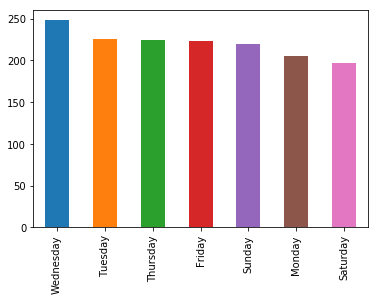

In [282]:
shooting[shooting.Age_range == '20 - 35']['daysofweek'].value_counts().plot(kind = 'bar')

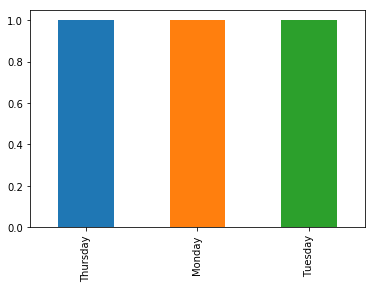

In [286]:
shooting[shooting.Age_range == 'Under 12']['daysofweek'].value_counts().plot(kind = 'bar')

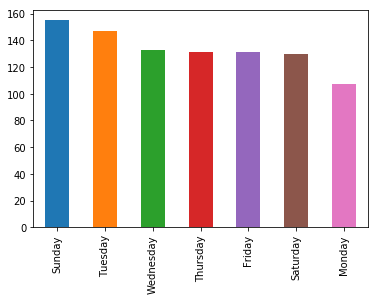

In [287]:
shooting[shooting.Age_range == '36 - 49']['daysofweek'].value_counts().plot(kind = 'bar')

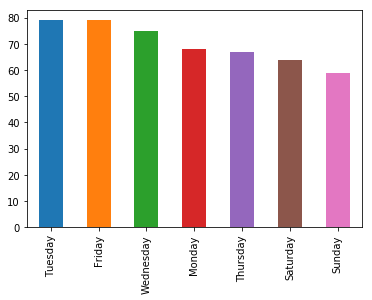

In [288]:
shooting[shooting.Age_range == '50 - 64']['daysofweek'].value_counts().plot(kind = 'bar')

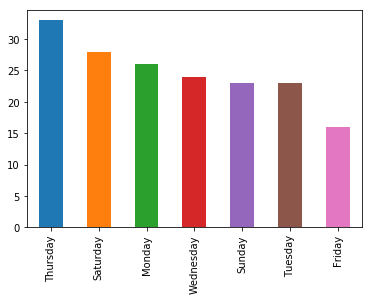

In [289]:
shooting[shooting.Age_range == '13 - 19']['daysofweek'].value_counts().plot(kind = 'bar')

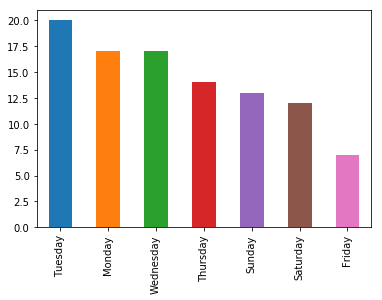

In [290]:
shooting[shooting.Age_range == 'Over 65']['daysofweek'].value_counts().plot(kind = 'bar')

In [32]:
shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3353 entries, 0 to 3352
Data columns (total 16 columns):
id                         3353 non-null int64
name                       3353 non-null object
date                       3353 non-null datetime64[ns]
manner_of_death            3353 non-null object
armed                      3349 non-null object
age                        3243 non-null float64
gender                     3348 non-null object
race                       3086 non-null object
city                       3353 non-null object
state                      3353 non-null object
signs_of_mental_illness    3353 non-null bool
threat_level               3353 non-null object
flee                       3248 non-null object
body_camera                3353 non-null bool
Age_range                  3243 non-null object
daysofweek                 3353 non-null object
dtypes: bool(2), datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 373.4+ KB


In [128]:
shooting[shooting.name == 'TK TK'][['name','age' , 'gender']]

,name,age,gender


In [123]:
shooting = shooting[~(shooting.name == 'TK TK')]

In [125]:
shooting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3267 entries, 0 to 3351
Data columns (total 16 columns):
id                         3267 non-null int64
name                       3267 non-null object
date                       3267 non-null datetime64[ns]
manner_of_death            3267 non-null object
armed                      3263 non-null object
age                        3234 non-null float64
gender                     3266 non-null object
race                       3071 non-null object
city                       3267 non-null object
state                      3267 non-null object
signs_of_mental_illness    3267 non-null bool
threat_level               3267 non-null object
flee                       3169 non-null object
body_camera                3267 non-null bool
Age_range                  3234 non-null object
daysofweek                 3267 non-null object
dtypes: bool(2), datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 389.2+ KB


In [127]:
shooting[shooting.race.isnull()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_range,daysofweek
57,110,William Campbell,2015-01-25,shot,gun,59.0,M,NaN,Winslow,NJ,False,attack,Not fleeing,False,50 - 64,Sunday
168,244,John Marcell Allen,2015-03-30,shot,gun,54.0,M,NaN,Boulder City,NV,False,attack,Not fleeing,False,50 - 64,Monday
324,433,Joseph Roy,2015-05-07,shot,knife,72.0,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False,Over 65,Thursday
384,503,James Anthony Morris,2015-05-31,shot,gun,40.0,M,NaN,Medford,OR,True,attack,Not fleeing,False,36 - 49,Sunday
403,523,James Johnson,2015-06-08,shot,gun,54.0,M,NaN,Beech Grove,IN,True,attack,Not fleeing,False,50 - 64,Monday
413,534,Mark Smith,2015-04-09,shot and Tasered,vehicle,54.0,M,NaN,Kellyville,OK,False,attack,Other,False,50 - 64,Thursday
421,542,Raymond Phillips,2015-06-11,shot,gun,86.0,M,NaN,Columbia,TN,True,attack,Not fleeing,False,Over 65,Thursday
479,604,Brian Johnson,2015-07-02,shot,crossbow,59.0,M,NaN,Meadow Bridge,WV,True,attack,Not fleeing,False,50 - 64,Thursday
513,641,Charles Crandall,2015-07-14,shot,gun,76.0,M,NaN,Southington,OH,False,attack,Not fleeing,False,Over 65,Tuesday
554,684,Timothy Johnson,2015-07-28,shot,knife,41.0,M,NaN,Manila,AR,False,other,Not fleeing,False,36 - 49,Tuesday


In [76]:
shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3353 entries, 0 to 3352
Data columns (total 16 columns):
id                         3353 non-null int64
name                       3353 non-null object
date                       3353 non-null datetime64[ns]
manner_of_death            3353 non-null object
armed                      3349 non-null object
age                        3243 non-null float64
gender                     3348 non-null object
race                       3086 non-null object
city                       3353 non-null object
state                      3353 non-null object
signs_of_mental_illness    3353 non-null bool
threat_level               3353 non-null object
flee                       3248 non-null object
body_camera                3353 non-null bool
Age_range                  3243 non-null object
daysofweek                 3353 non-null object
dtypes: bool(2), datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 373.4+ KB


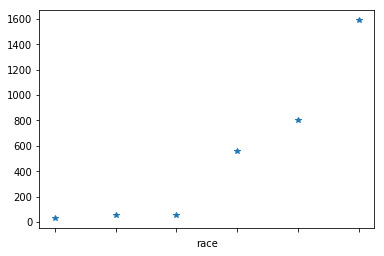

In [91]:
shooting.groupby('race').size().sort_values().plot(style ='*' , x = 'race')

In [101]:
shooting.groupby('race').age.describe().sort_values(by = 'count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
W,1582.0,39.898862,13.299066,6.0,30.00,38.0,50.00,91.0
B,789.0,32.231939,11.129519,13.0,24.00,30.0,38.00,77.0
H,545.0,33.234862,11.040362,14.0,25.00,32.0,39.00,80.0
N,54.0,30.759259,8.555998,14.0,24.25,30.0,35.75,53.0
A,52.0,34.942308,11.676041,15.0,27.00,33.5,41.50,61.0
O,32.0,32.531250,10.683072,18.0,25.00,29.0,38.75,56.0


In [106]:
shooting.groupby([shooting.date.dt.year , 'race']).age.describe().sort_values(by = 'date', ascending = True)

count       mean        std   min    25%   50%    75%   max
date race                                                             
2015 A      13.0  39.076923  11.707985  25.0  31.00  35.0  44.00  60.0
     B     256.0  31.929688  11.198868  15.0  24.00  29.0  37.00  77.0
     H     171.0  33.426901  10.169689  15.0  26.00  32.0  40.00  69.0
     N       9.0  30.444444   8.368260  19.0  24.00  31.0  35.00  46.0
     O      15.0  32.666667  11.349428  18.0  25.50  30.0  44.00  50.0
     W     494.0  39.546559  13.395863   6.0  29.00  38.0  49.00  83.0
2016 O      11.0  33.272727  12.125105  18.0  27.00  29.0  37.00  56.0
     N      16.0  32.375000   8.381527  19.0  26.75  31.5  36.50  49.0
     W     464.0  40.116379  12.957625  12.0  30.00  38.0  50.00  83.0
     B     229.0  31.004367  10.508767  13.0  23.00  30.0  37.00  66.0
     A      15.0  36.733333  12.713697  15.0  27.50  38.0  44.50  61.0
     H     155.0  32.980645  11.348363  14.0  24.00  31.0  38.00  80.0
2017 A      16.0  31.750000  10.680200  18.0  22.00  31.0  38.00  56.0
     B     220.0  32.527273  11.454663  15.0  24.00  30.0  39.25  68.0
     H     176.0  32.977273  11.372626  15.0  25.00  32.0  39.00  71.0
     N      22.0  29.272727   8.401711  14.0  24.25  29.0  33.00  53.0
     O       6.0  30.833333   6.940221  25.0  25.50  28.0  35.75  41.0
     W     456.0  40.061404  13.464343  15.0  30.00  38.0  50.00  91.0
2018 N       7.0  32.142857  10.636863  20.0  24.00  32.0  37.50  50.0
     A       8.0  31.250000  10.633505  18.0  25.50  30.5  35.25  52.0
     B      84.0  35.726190  11.139154  16.0  27.75  34.0  41.00  72.0
     H      43.0  34.441860  12.119057  18.0  25.00  33.0  43.50  60.0
     W     168.0  39.892857  13.588493  16.0  28.00  39.0  49.00  81.0

In [116]:
shooting.groupby([shooting.date.dt.year , 'race']).Age_range.value_counts().sort_values(ascending =False)

date  race  Age_range
2015  W     20 - 35      197
2017  W     20 - 35      187
2016  W     20 - 35      174
2015  B     20 - 35      157
      W     36 - 49      155
2016  W     36 - 49      153
2017  W     36 - 49      138
2016  B     20 - 35      132
2017  B     20 - 35      129
2016  W     50 - 64      107
2015  W     50 - 64      105
      H     20 - 35      100
2017  H     20 - 35       98
      W     50 - 64       93
2016  H     20 - 35       91
2018  W     20 - 35       70
2015  B     36 - 49       57
2018  W     36 - 49       56
2016  B     36 - 49       52
2017  B     36 - 49       51
2015  H     36 - 49       48
2017  H     36 - 49       45
2016  H     36 - 49       44
2018  B     20 - 35       43
            36 - 49       32
2016  B     13 - 19       29
2018  W     50 - 64       29
2017  W     Over 65       23
2015  B     13 - 19       21
      W     13 - 19       20
                        ... 
      A     50 - 64        3
            36 - 49        3
      B     Over 65  

In [117]:
shooting.groupby( 'race').Age_range.value_counts().sort_values(ascending =False)

race  Age_range
W     20 - 35      628
      36 - 49      502
B     20 - 35      461
W     50 - 64      334
H     20 - 35      309
B     36 - 49      192
H     36 - 49      150
B     13 - 19       71
W     Over 65       66
B     50 - 64       56
W     13 - 19       50
H     13 - 19       39
      50 - 64       39
N     20 - 35       36
A     20 - 35       26
O     20 - 35       18
A     36 - 49       14
N     36 - 49       12
B     Over 65        9
H     Over 65        8
O     36 - 49        8
A     50 - 64        7
      13 - 19        5
N     13 - 19        4
O     13 - 19        3
      50 - 64        3
N     50 - 64        2
W     Under 12       2
Name: Age_range, dtype: int64

In [121]:
shooting[shooting.Age_range == 'Under 12']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_range,daysofweek
830,980,Jeremy Mardis,2015-11-03,shot,unarmed,6.0,M,W,Marksville,LA,False,other,Car,True,Under 12,Tuesday
1008,1165,Ciara Meyer,2016-01-11,shot,unarmed,12.0,F,W,Penn Township,PA,False,other,Not fleeing,False,Under 12,Monday
2910,3229,Kameron Prescott,2017-12-21,shot,unarmed,6.0,M,NaN,Schertz,TX,False,other,Not fleeing,False,Under 12,Thursday


In [187]:
shooting1 = shooting.groupby(['daysofweek','Age_range',  'race'])['body_camera'].count().unstack('race').fillna('')
shooting1.unstack('Age_range').fillna('')
#shooting1.plot()

race             A                                                B          \
Age_range  13 - 19 20 - 35 36 - 49 50 - 64 Over 65 Under 12 13 - 19 20 - 35   
daysofweek                                                                    
Friday           1     4.0     2.0       1                      9.0    57.0   
Monday                 3.0     1.0                             13.0    58.0   
Saturday         2     4.0     3.0       1                     11.0    62.0   
Sunday           1     2.0     2.0                              7.0    65.0   
Thursday         1     2.0     1.0       2                     13.0    72.0   
Tuesday                3.0     2.0       2                      7.0    60.0   
Wednesday              8.0     3.0       1                     11.0    87.0   

race                         ...          O                                W  \
Age_range  36 - 49 50 - 64   ...    36 - 49 50 - 64 Over 65 Under 12 13 - 19   
daysofweek                   ...                                               
Friday        29.0     6.0   ...          2                              4.0   
Monday        17.0    10.0   ...                                         5.0   
Saturday      23.0     8.0   ...                                        12.0   
Sunday        29.0    10.0   ...                                         8.0   
Thursday      35.0     7.0   ...          2                              9.0   
Tuesday       26.0     6.0   ...          1       2                      6.0   
Wednesday     31.0     9.0   ...          3       1                      5.0   

race                                                 
Age_range  20 - 35 36 - 49 50 - 64 Over 65 Under 12  
daysofweek                                           
Friday        93.0    71.0    56.0     3.0           
Monday        98.0    62.0    40.0    12.0        1  
Saturday      69.0    77.0    47.0     6.0           
Sunday        86.0    86.0    37.0     9.0           
Thursday      82.0    54.0    45.0    11.0           
Tuesday      109.0    78.0    55.0    12.0        1  
Wednesday     91.0    73.0    54.0    13.0           

[7 rows x 36 columns]

In [191]:
shooting.groupby(['daysofweek',  'race'])['body_camera'].count().unstack('race').fillna('')

race,A,B,H,N,O,W
daysofweek,,,,,,
Friday,8,105,78,6,5,228
Monday,4,101,68,7,4,218
Saturday,10,106,69,8,3,212
Sunday,5,112,83,9,3,226
Thursday,6,131,100,6,5,202
Tuesday,8,100,83,8,4,261
Wednesday,12,141,70,10,8,238
